+ 로직 생각
+ 1. 데이터셋 분리(1/3테스트셋. 나머지 트레이닝셋)
+ 2. 라벨링 데이터 따로 분리
+ 3. for문을 통해 분석하고자 하는 열과 나머지를 유클리드로 표현
+ 4. 1행으로 된 유클리드 거리에 라벨링데이터를 합치고, sort를 통해 거리순으로 나타냄
+ 5. k번째까지 데이터의 비율을 조합해 예측
+ 6. 결과값 반출

In [174]:
# Read MNIST data
import pandas as pd
import numpy as np
import math as math
import scipy
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


data = pd.read_csv('MNIST_100.csv')
data = data.head(100).append(data.tail(100))
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [180]:
def indexReset(dataset,indexset):
    dataset = dataset.reset_index(drop=True)
    dataset.index = indexset
    return dataset

Y = data.iloc[:,0].values
X = data.drop('label', axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
X_train = indexReset(X_train,Y_train)
X_test = indexReset(X_test,Y_test)
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [182]:
forList = X_train.shape[0]
print(forList)
edist = []
k = 5
for i in range(listL):
    appendList= []
    dist = np.sqrt(np.sum((np.tile(X_test.iloc[i,:],(forList,1))-X_train)**2,axis=1))
    print(dist)
    dist =dist.sort_values(ascending=True)
    
    edist.append(dist.iloc[i:i+k].index.tolist())

134
0    2779.966367
9    2556.957763
0    1807.620259
9    2892.883164
0    2370.942007
        ...     
9    2632.973984
0    3137.865357
0    2570.760977
9    2696.133528
9    2861.419578
Length: 134, dtype: float64
0    2922.800198
9    2856.093311
0    2372.611009
9    2525.983175
0    1704.356183
        ...     
9    3004.131488
0    2612.332100
0    1957.860056
9    2757.771927
9    2475.287458
Length: 134, dtype: float64
0    2369.503746
9    2806.913964
0    1660.062047
9    3107.240898
0    2709.462493
        ...     
9    2791.767003
0    3249.810764
0    2651.862553
9    2934.141612
9    3164.092129
Length: 134, dtype: float64
0    3176.395441
9    1787.259354
0    2798.251240
9    2389.702910
0    2798.199957
        ...     
9    2059.590979
0    3165.471529
0    2949.684220
9    1649.824536
9    2029.619915
Length: 134, dtype: float64
0    3274.670823
9    1822.173153
0    2801.272032
9    2299.103956
0    2727.934383
        ...     
9    1921.889175
0    3178.561467


0    3295.056297
9    2224.453191
0    2927.060642
9    1734.005190
0    2569.720413
        ...     
9    2368.798641
0    2920.716008
0    2817.795060
9    1501.911782
9    1438.432133
Length: 134, dtype: float64
0    2598.045034
9    3022.511208
0    1863.499933
9    3006.119093
0    2310.910859
        ...     
9    3192.851860
0    2595.092291
0    2408.242720
9    3085.348441
9    3223.496083
Length: 134, dtype: float64
0    3371.605701
9    1957.564047
0    2971.461088
9    2366.413108
0    2966.324662
        ...     
9    2413.551740
0    3249.789070
0    3110.802147
9    1684.334884
9    1946.248699
Length: 134, dtype: float64
0    3207.897131
9    1751.595844
0    2780.812112
9    2510.416300
0    2904.964888
        ...     
9    1958.917303
0    3252.069802
0    3057.571749
9    2049.122983
9    2345.348801
Length: 134, dtype: float64
0    2701.349478
9    2581.959914
0    2307.985485
9    2719.678474
0    2222.031953
        ...     
9    2678.867671
0    2652.384776
0   

IndexError: single positional indexer is out-of-bounds

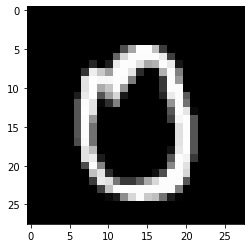

Actual : 0
Predict : 0


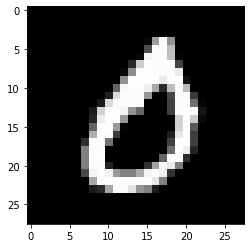

Actual : 0
Predict : 0


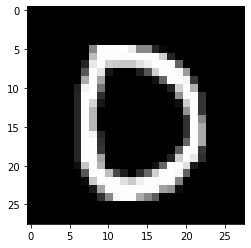

Actual : 0
Predict : 0


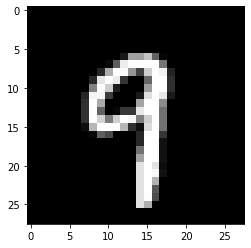

Actual : 9
Predict : 9


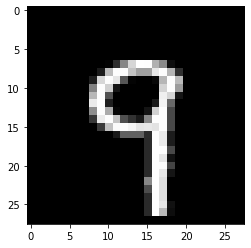

Actual : 9
Predict : 9


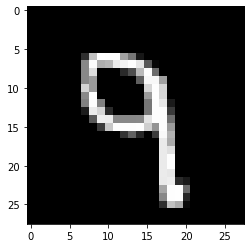

Actual : 9
Predict : 9


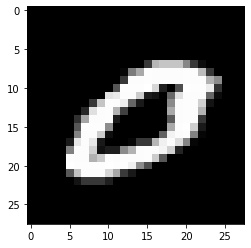

Actual : 0
Predict : 0


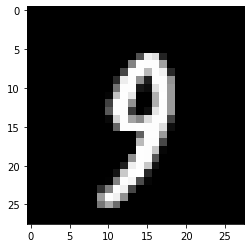

Actual : 9
Predict : 9


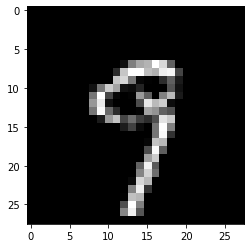

Actual : 9
Predict : 9


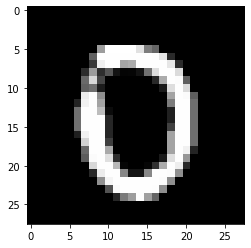

Actual : 0
Predict : 0


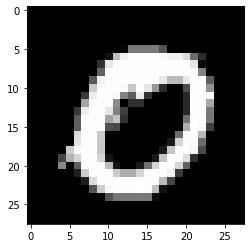

Actual : 0
Predict : 0


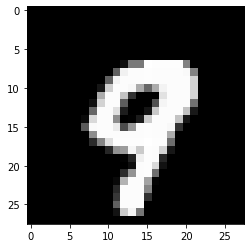

Actual : 9
Predict : 9


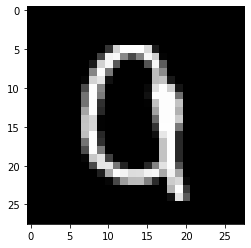

Actual : 9
Predict : 9


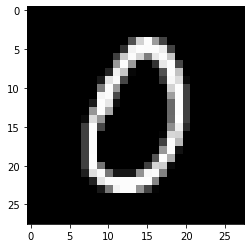

Actual : 0
Predict : 0


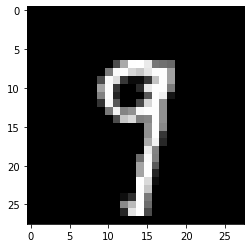

Actual : 9
Predict : 9


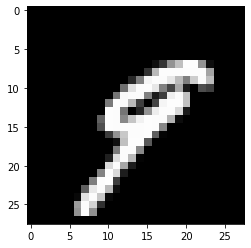

Actual : 9
Predict : 9


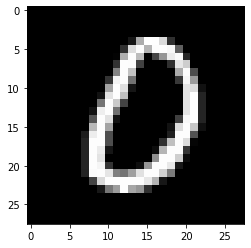

Actual : 0
Predict : 0


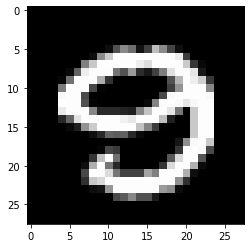

Actual : 9
Predict : 0


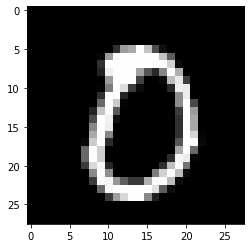

Actual : 0
Predict : 0


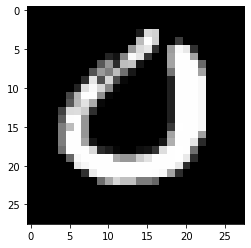

Actual : 0
Predict : 0


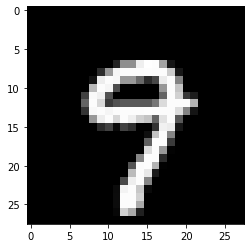

Actual : 9
Predict : 9


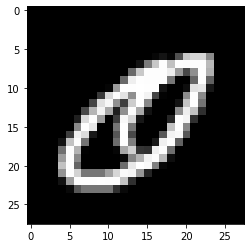

Actual : 0
Predict : 9


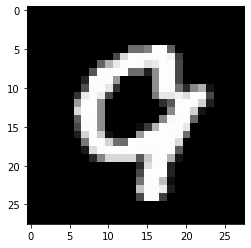

Actual : 9
Predict : 9


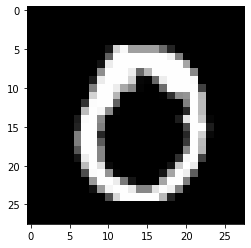

Actual : 0
Predict : 0


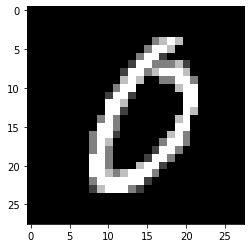

Actual : 0
Predict : 9


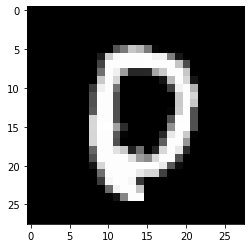

Actual : 0
Predict : 0


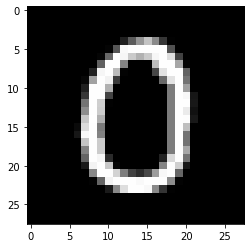

Actual : 0
Predict : 0


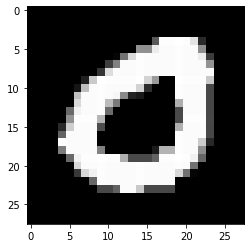

Actual : 0
Predict : 0


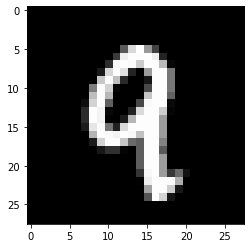

Actual : 9
Predict : 9


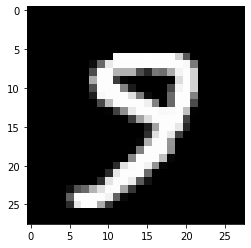

Actual : 9
Predict : 9


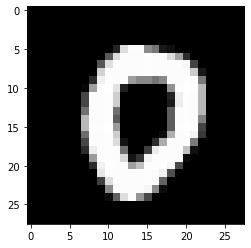

Actual : 0
Predict : 0


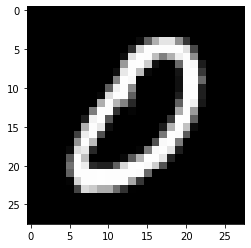

Actual : 0
Predict : 0


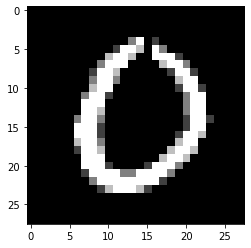

Actual : 0
Predict : 0


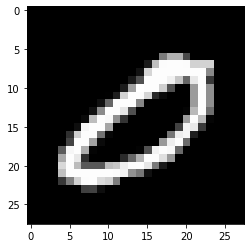

Actual : 0
Predict : 0


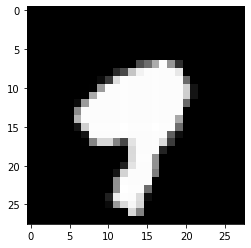

Actual : 9
Predict : 9


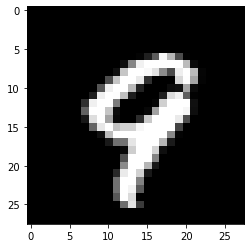

Actual : 9
Predict : 9


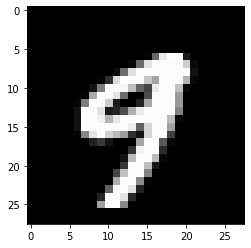

Actual : 9
Predict : 9


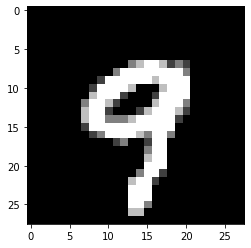

Actual : 9
Predict : 9


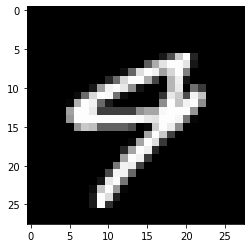

Actual : 9
Predict : 9


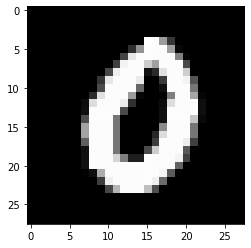

Actual : 0
Predict : 9


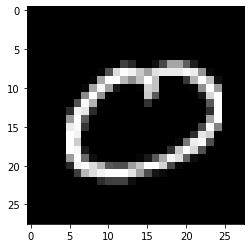

Actual : 0
Predict : 0


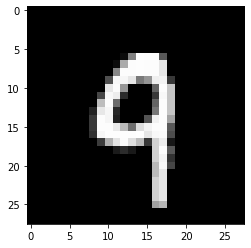

Actual : 9
Predict : 9


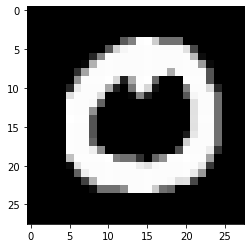

Actual : 0
Predict : 0


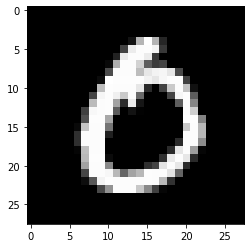

Actual : 0
Predict : 9


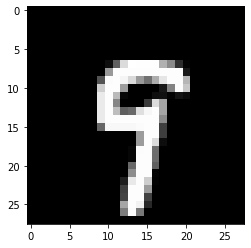

Actual : 9
Predict : 9


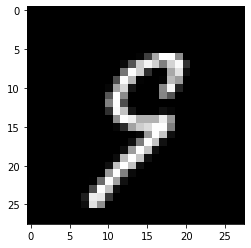

Actual : 9
Predict : 9


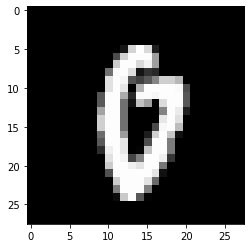

Actual : 0
Predict : 9


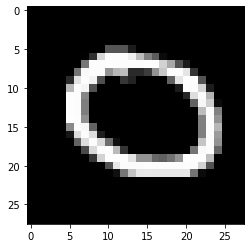

Actual : 0
Predict : 0


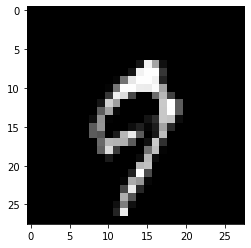

Actual : 9
Predict : 9


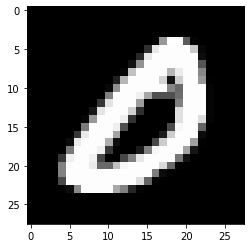

Actual : 0
Predict : 0


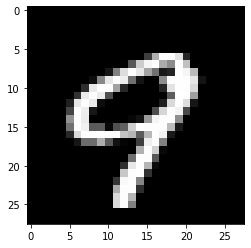

Actual : 9
Predict : 9


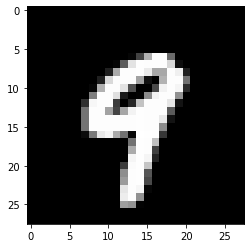

Actual : 9
Predict : 9


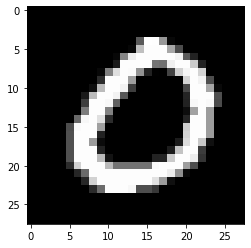

Actual : 0
Predict : 0


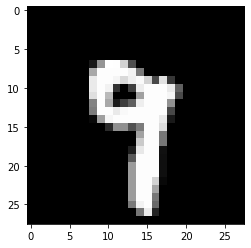

Actual : 9
Predict : 9


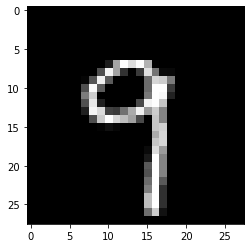

Actual : 9
Predict : 9


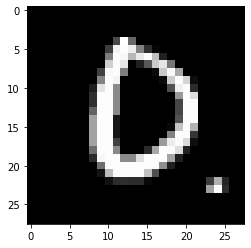

Actual : 0
Predict : 9


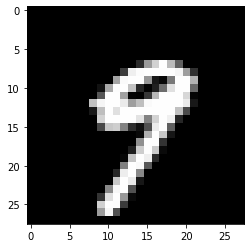

Actual : 9
Predict : 9


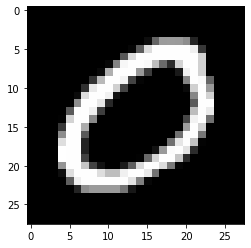

Actual : 0
Predict : 9


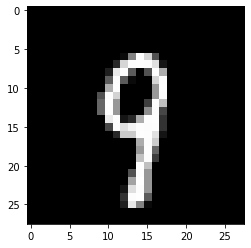

Actual : 9
Predict : 9


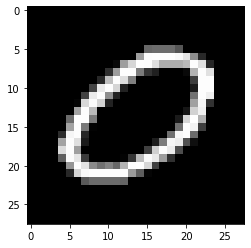

Actual : 0
Predict : 0


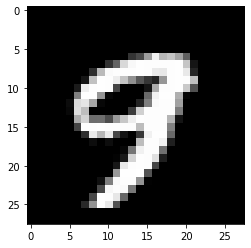

Actual : 9
Predict : 9


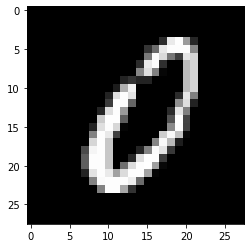

Actual : 0
Predict : 9


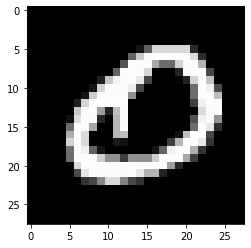

Actual : 0
Predict : 9


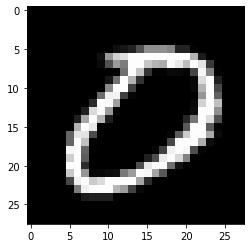

Actual : 0
Predict : 9


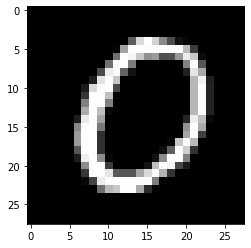

Actual : 0
Predict : 9


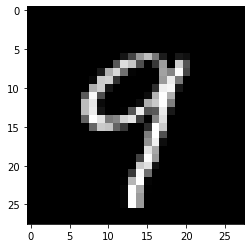

Actual : 9
Predict : 0


In [177]:
forNum = 0
forImg = X_test.to_numpy()
for i in range(len(edist)):
    predNum = 0
    predict = 0
    for j in range(len(edist[i])):
        if edist[i][j] == Y_test[i]:
            predNum +=1
        else:
            predict = edist[i][j]
            pass

    if predNum >= k/2:
        drawImg(forImg[i])
        print("Actual : "+str(int(Y_test[i])))
        print("Predict : "+ str(int(Y_test[i])))
        
    else:
        drawImg(forImg[i])
        print("Actual : "+str(int(Y_test[i])))
        print("Predict : "+ str(int(predict)))
def drawImg(sample): 
    img = sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()
